# Classificando clientes com Knn, BernoulliNB e Arvore de decisao

#### Temos um DataSet com dados de diversos clientes e suas caracteristicas. O objetivo é descobrir, com base neses dados, se um novo cliente provavelmente irá de desligar ou não dos serviços da empresa.

In [5]:
import pandas as pd
dados = pd.read_csv('/content/sample_data/Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Modificando os dados manualmente
##### 'Sim': 1,
##### 'Nao': 0

In [6]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


### Modificando os dados com get_dummies

In [7]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

### Concatenando os dados transformados

In [ ]:
#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

### Visualizando o dataSet completo apos transformações

In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


### Criando dados Xmaria para Previsão

In [11]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Novos pares de informações = ($Xmaria$, $ymaria$)

## Balanceamento dos dados

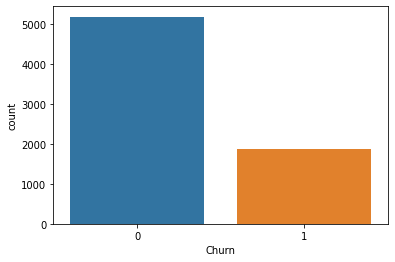

In [13]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [15]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

### Separando as variaveis X e Y

In [16]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

### Balanceamento com SMOTE

In [17]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

### Concatenando os dados balanceados

In [18]:
dados_final = pd.concat([X, y], axis=1)

In [19]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


### Verificando balanceamento

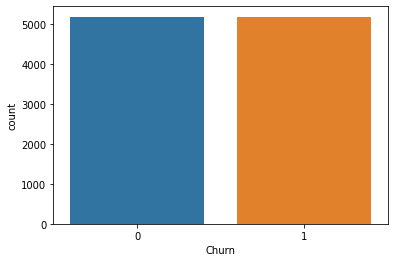

In [20]:
ax = sns.countplot(x='Churn', data=dados_final)

## Separando as variaveis (inputs e outputs)

In [24]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

## Padronizando as escalas com o StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

### Normalizando o XMaria que será previsto
Para isso, é necessario que tenhamos as 2 dimensões, como Xmaria so tem uma, iremos passsar no parametro um dataFrame com a outra dimensão

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))

## Separando Treino e Teste

In [36]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

# Classificação com KNN

### Instanciando e fazendo fit do modelo

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_treino, y_treino)

### Realizando previsao com knn

In [41]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

# Classificação com o modelo Bernoulli de Naive Bayes

### Instanciando modelo

In [43]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=-0.44)

In [45]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

### binarize=-0.44
Se tiver acima de 0.44, classifica como 1, se tiver abaixo, classifica como 0..

Usado para transformar características não-binárias em binárias.

O modelo so usa caracteristicas binarias, por isso a transformação é necessaria

### Fazendo o fit e previsão 

In [48]:
bnb.fit(X_treino, y_treino)

predito_BNb = bnb.predict(X_teste)

BernoulliNB(binarize=-0.44)

# Classificação com Arvore de decisão

### Instanciando e fit do modelo

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

dtc.fit(X_treino, y_treino)

### Previsao

In [78]:
predito_ArvoreDecisao = dtc.predict(X_teste)

# Validação dos modelos

## Matriz de confusão


In [100]:
from sklearn.metrics import confusion_matrix

### Knn

In [101]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


### BernoulliNB

In [102]:
print(confusion_matrix(y_teste, predito_BNb))

[[1050  519]
 [ 242 1294]]


### Arvore de decisão

In [103]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


#  Acurácia

In [104]:
from sklearn.metrics import accuracy_score

### Knn

In [105]:
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


### BernoulliNB

In [106]:
print(accuracy_score(y_teste, predito_BNb))

0.7549114331723027


### Arvore de decisão

In [107]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


#  Precisão

In [108]:
from sklearn.metrics import precision_score

### Knn

In [109]:
print(precision_score(y_teste, predito_knn))

0.7971552257266543


### BernoulliNB

In [110]:
print(precision_score(y_teste, predito_BNb))

0.7137341423055709


### Arvore de decisão

In [111]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7973400886637112


# Recall

In [112]:
from sklearn.metrics import recall_score

### Knn

In [2]:
print(recall_score(y_teste, predito_knn))

###  Bernoulli 

In [114]:
print(recall_score(y_teste, predito_BNb))

0.8424479166666666


### Arvore de decisão

In [115]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8196614583333334


### Por fim, com base nas metricas de desempenho, podemos avaliar qual seria o melhor modelo para utilizarmos, dependendo do nosso objetivo